<a href="https://colab.research.google.com/github/Vedika2203/GRIP-TSF-Internship/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analysis using decision tree

-Importing libraries- 

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pydot
from IPython.display import Image

-Load the dataset- 

In [ ]:
iris = load_iris()
X=iris.data[:,:] 
y=iris.target

-Input data-

In [ ]:
data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


-Visualization- 

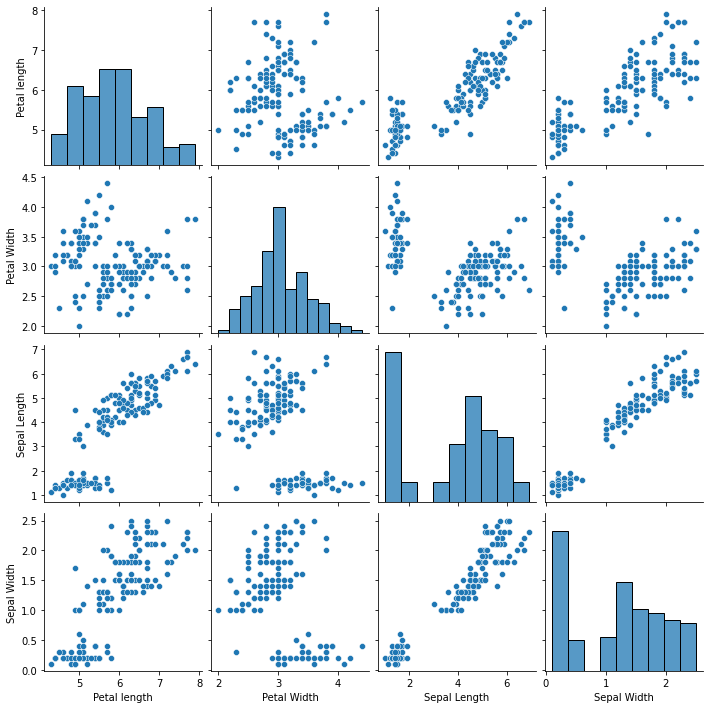

In [ ]:
sns.pairplot(data)

-Scatter plot based on sepal length and width features-

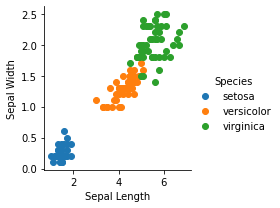

In [ ]:
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()


-Scatter plot based on petal length and width features-

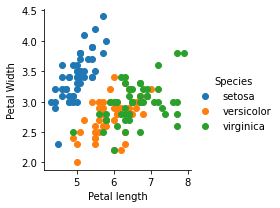

In [ ]:
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Petal length','Petal Width').add_legend()
plt.show()

-Model Training- 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) 
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
print("Training Complete.")
y_pred = tree_classifier.predict(X_test)
print("Training Complete.")

Training Complete.
Training Complete.


-Actual Values V/S Predicted Values

In [ ]:
db = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred}) 
db

,Actual Values,Predicted Values
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2
7,0,0
8,0,0
9,2,2


-Visualizing the trained model- 

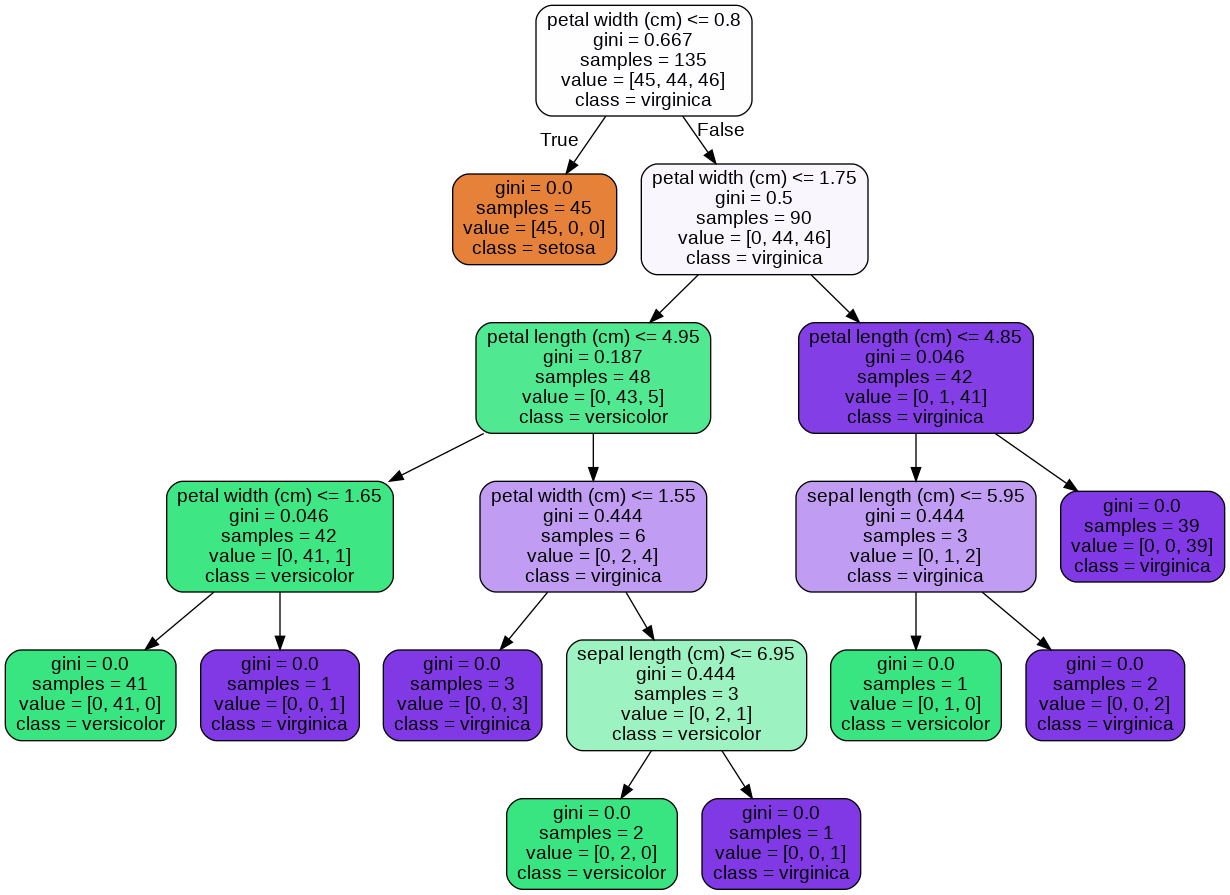

In [ ]:
export_graphviz(
        tree_classifier,
        out_file="img\desision_tree.dot",
        feature_names=iris.feature_names[:],
        class_names=iris.target_names,
        rounded=True,
        filled=True

)
#All four features are considered here. 

(graph,) = pydot.graph_from_dot_file('img\desision_tree.dot')
graph.write_png('img\desision_tree.png')

Image(filename='img\desision_tree.png')

-Predicting Random output-

In [ ]:
#This is done to check credibility of our model
#Random values for Petal, Width and Seepal Length are taken

print("Class Names = ",iris.target_names)

# Estimating probability
print()
print("Estimating Class Probabilities for flower whose petals length width are 4.9cm and 3.4cm and sepal length and width are 1.5cm and 0.4cm. ")
print()
print('Output = ',tree_classifier.predict([[4.9, 3.4, 1.5, 0.4]]))
print()
print("Our model predicts the class as 0, that is, setosa.")

Class Names =  ['setosa' 'versicolor' 'virginica']

Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. 

Output =  [0]

Our model predicts the class as 0, that is, setosa.


-Model Accuracy-

In [ ]:
print("Accuracy of the model created:",sm.accuracy_score(y_test, y_pred))

Accuracy of the model created: 1.0


The model accuracy is 100% since all four features of the dataset are considered by creating the decision tree. 